In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
# To use only Google Colab
# ! pip install matplotlib --upgrade

In [ ]:
# To use only Google Colab
# ! pip install matplotlib --upgrade
# ! wget https://github.com/javieriserte/qualitative-data-course/raw/master/classes/C01.py


# Unidad I. Variables, distribuciones y pruebas de hipótesis.

- Características numéricas de las variables aleatorias
- Concepto de muestra
- Estimación estadística de los parámetros de una distribución a partir de los
datos de una muestra



## Introducción y motivación


### ¿Qué es el análisis de datos?

El **análisis de datos** es el proceso de: explorar, limpiar, describir e interpretar información para **responder preguntas o generar conocimiento**.

En cualquier campo el análisis de datos busca **transformar observaciones en comprensión**.



Existen dos grandes enfoques complementarios:

| **Enfoque**             | **Objetivo principal**                                                                          | **Tipos de datos biológicos**                                                                                                 | **Ejemplos de análisis en biología / bioinformática**                                                                                                                                                                                                      |
| ----------------------- | ----------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Cuantitativo**        | Medir, comparar o predecir fenómenos biológicos mediante variables numéricas                    | Medidas experimentales, conteos, intensidades, secuencias cuantificadas, expresiones génicas                                  | - Análisis de expresión diferencial (RNA-seq)<br>- Cálculo de diversidad genética<br>- Modelos de crecimiento poblacional<br>- Cuantificación de metabolitos o proteínas                                                                                   |
| **Cualitativo**         | Comprender patrones, funciones o significados biológicos a partir de observaciones no numéricas | Secuencias de ADN o proteínas (como texto simbólico), imágenes biológicas, anotaciones funcionales, descripciones fenotípicas | - Clasificación funcional de genes (Gene Ontology)<br>- Análisis de patrones morfológicos o fenotípicos<br>- Codificación de observaciones en experimentos de campo<br>- Interpretación de datos de literatura científica o entrevistas con investigadores |


Ambos enfoques pueden **complementarse**.

El análisis cualitativo incluye pasos **cuantitativos**:

- contar categorías
- frecuencias
- coocurrencias entre temas.


### El lugar del análisis descriptivo

El **análisis descriptivo** es la primera etapa del análisis cuantitativo y cualitativo.

Su objetivo no es probar hipótesis, sino **entender los datos** o **generar una intuición de los datos**:

* ¿Qué variables existen y cómo están distribuidas?
* ¿Qué valores son típicos o extremos?
* ¿Existen patrones, relaciones o agrupamientos visibles?

Este tipo de análisis nos da un **mapa inicial del territorio**, antes de aplicar modelos o pruebas estadísticas más avanzadas.


### Datos, variables y observaciones

Para analizar datos, necesitamos definir algunos conceptos clave:

* **Población:** conjunto total de elementos sobre los que queremos estudiar una característica (por ejemplo, *todas las flores de una especie*).
* **Muestra:** subconjunto de la población del cual obtenemos datos.
* **Observación:** cada fila del conjunto de datos; representa una unidad individual (por ejemplo, *una flor medida*).
* **Variable:** característica medible de una observación (por ejemplo, *largo del pétalo*).


In [10]:
import pandas as pd

from sklearn import datasets

# Cargamos el dataset clásico de Iris
iris = datasets.load_iris(as_frame=True)
df = iris.frame

# Mostramos las primeras filas
df.head()

target
0    50
1    50
2    50
Name: count, dtype: int64


- Cada fila es una **observación** (una flor)
- Cada columna es una **variable aleatoria**

### Un ejemplo: el conjunto de datos *Iris*

El dataset **Iris** contiene mediciones de tres especies de flores:

* *Iris setosa*
* *Iris versicolor*
* *Iris virginica*

Cada muestra incluye:

| Variable            | Descripción         | Tipo       |
| ------------------- | ------------------- | ---------- |
| `sepal length (cm)` | Largo del sépalo    | Continua   |
| `sepal width (cm)`  | Ancho del sépalo    | Continua   |
| `petal length (cm)` | Largo del pétalo    | Continua   |
| `petal width (cm)`  | Ancho del pétalo    | Continua   |
| `target`            | Especie (categoría) | Categórica |



### Tipos de variables categóricas

Las **variables categóricas** representan **atributos o categorías** que
**no son numéricamente medibles**, pero sí permiten clasificar a los elementos
de una población en grupos o clases.

Estas variables **no expresan cantidades**, sino **tipos**, **clases** o **niveles** de una característica.


| **Tipo de variable**                                | **Características**                                                                                              | **Ejemplos biológicos / bioinformáticos**                                                                                                        | **Operaciones permitidas**                                                                      |
| --------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------ | ----------------------------------------------------------------------------------------------- |
| **Nominal**                                         | - Las categorías **no tienen orden lógico**.<br>- Se usan para **identificar o clasificar**.                     | - Especie (*Iris setosa*, *I. versicolor*, *I. virginica*)<br>- Tipo de tejido (hígado, cerebro, pulmón)<br>- Genotipo (AA, Aa, aa)              | Igualdad / diferencia.<br>Conteo de frecuencias.                                                |
| **Ordinal**                                         | - Las categorías **tienen un orden natural**, pero **no una distancia cuantificable** entre ellas.               | - Grado de expresión génica (bajo, medio, alto)<br>- Escala de severidad clínica (leve, moderada, severa)<br>- Etapas del desarrollo embrionario | Comparaciones de orden (“mayor que”, “menor que”).<br>Medidas no paramétricas (rango, mediana). |

**Variables dicotómica**: Caso especial de variable nominal de dos categorías.

**Variables multiclase**: Caso especial de variable nominal de más de dos categorías.

**One-Hot encoding**:

- Transformación numérica de variables categóricas para análisis computacional.
- Codificación de especies en 0/1 para modelos de ML.



In [11]:
### Ejemplo práctico en Python

import pandas as pd

data = {
    "Especie": ["setosa", "versicolor", "virginica", "setosa", "versicolor"],
    "Color_flor": ["blanca", "rosada", "violeta", "blanca", "rosada"],
    "Expresión_gen": ["baja", "alta", "media", "baja", "alta"],
    "Presencia_mutación": [0, 1, 1, 0, 1]
}

df = pd.DataFrame(data)
df


,Especie,Color_flor,Expresión_gen,Presencia_mutación
0,setosa,blanca,baja,0
1,versicolor,rosada,alta,1
2,virginica,violeta,media,1
3,setosa,blanca,baja,0
4,versicolor,rosada,alta,1


Aquí tenemos:

* `Especie` → **Nominal (multiclase)**
* `Color_flor` → **Nominal (multiclase)**
* `Expresión_gen` → **Ordinal**
* `Presencia_mutación` → **Nominal (dicotómica)**



### Las variables categóricas no admiten diferencias

Una **variable categórica nominal** cumple:

* Sus valores **no tienen orden** (por ejemplo: “mamífero”, “reptil”, “ave”).
* Y además, **no existe una métrica** que permita decir cuán “distante” está una categoría de otra.

Por tanto:

* “mamífero – reptil” o “ave – mamífero” **no tienen sentido numérico**.
* Solo se puede preguntar **si son iguales o diferentes**, no **cuánto** diferentes.

Esto distingue lo **categórico** de lo **cuantitativo**.

### Casos intermedios: cuando hay estructura o similitud entre categorías

Aunque formalmente siguen siendo categóricas, hay **situaciones donde se puede definir una noción de “distancia”** entre categorías *basada en conocimiento externo*.

No es una diferencia numérica natural, pero sí **una medida de disimilitud**.

### Ejemplos en biología / bioinformática:

| Caso                                              | Tipo original                                 | Posible “métrica” derivada                                       | Ejemplo de uso                                                           |
| ------------------------------------------------- | --------------------------------------------- | ---------------------------------------------------------------- | ------------------------------------------------------------------------ |
| **Categorías con relación filogenética**          | Nominal (especie, género, familia)            | Distancia filogenética (número de cambios o ramas entre taxones) | Distancia evolutiva entre especies: *Homo sapiens* vs. *Pan troglodytes* |
| **Categorías simbólicas complejas**               | Nominal (secuencia proteica, tipo de dominio) | Distancia de edición o similaridad de secuencia                  | Comparar dos proteínas según su similitud de secuencia                   |
| **Categorías espaciales**                         | Nominal (sitio geográfico, hábitat)           | Distancia geográfica (km) o ambiental (gradiente ecológico)      | Sitios de muestreo en ecología                                           |
| **Categorías codificadas semánticamente**         | Nominal (función génica, GO term)             | Distancia semántica entre ontologías (GO hierarchy distance)     | Comparar funciones biológicas entre genes                                |
| **Datos lingüísticos o cualitativos codificados** | Nominal (palabras, códigos de texto)          | Distancia de Levenshtein o embeddings                            | Procesamiento de lenguaje en bioinformática                              |

En todos estos casos, **la variable sigue siendo categórica**,
pero se puede **definir una función de distancia entre categorías**, que permite tratarlas con métodos cuantitativos.



### Concepto intermedio: *variables nominales métricas*

En algunos campos (p. ej., ciencias sociales o biología computacional) se usa la noción informal de **variable nominal métrica**, cuando:

* Las categorías **no tienen orden inherente**,
* pero se **les asigna una distancia basada en similitud estructural, funcional o semántica**.

Esto permite aplicar métodos cuantitativos como:

* **Análisis de correspondencias** (CA)
* **Escalamiento multidimensional (MDS)**
* **Análisis de redes o grafos semánticos**
* **Kernel methods** (cuando las categorías se codifican en un espacio vectorial)



## Análisis descriptivo de datos

El **análisis descriptivo** es la primera etapa del análisis estadístico.
Su objetivo es **resumir y comprender** la información contenida en una muestra de datos.


### Propósito

Describir **cómo son los datos**, sin intentar aún sacar conclusiones generales sobre la población.

### Dos formas complementarias

| Tipo de descripción         | Qué hace                                           | Herramientas típicas                                            |
| --------------------------- | -------------------------------------------------- | --------------------------------------------------------------- |
| **Cualitativa (gráfica)**   | Muestra patrones y relaciones de forma visual.     | Histogramas, scatter plots, boxplots, mapas de calor.           |
| **Cuantitativa (numérica)** | Resume los datos mediante valores representativos. | Media, mediana, moda, varianza, desviación estándar.            |

### Rol en el proceso de análisis

El análisis descriptivo está íntimamente ligado al:

* **Análisis exploratorio de datos (EDA)** → detectar patrones, anomalías, o relaciones.
* **Planteo de hipótesis** → formular preguntas a verificar con nuevas muestras o experimentos.
* **Diseño experimental posterior** → orientar la recolección de datos futuros.


## Muestra estadística

### ¿Qué es una muestra?

Una **muestra** es un **subconjunto de datos** extraído de una **población estadística**,
obtenido mediante un **proceso de muestreo** definido.

- Permite estudiar la población sin observarla por completo.
- Cada **observación** representa una **unidad muestral**, sobre la cual se miden una o más **variables aleatorias**.



### Tipos de muestras

| Tipo de muestra    | Descripción                                                                                           | Ventajas / Desafíos                                                               |
| ------------------ | ----------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------- |
| **Completa**       | Incluye **todos los casos** de la población que cumplen un criterio.                                  | 🔸 Ideal, pero casi siempre **imposible** por costo o tiempo.                     |
| **Representativa** | Contiene una **porción seleccionada aleatoriamente** de la población, reflejando sus características. | 🔸 **Más realista y útil**.<br>🔸 Reduce el **sesgo** si el muestreo es adecuado. |




### Clave para un buen muestreo

Una **muestra representativa** debe obtenerse con un proceso que:

* No dependa de las propiedades individuales de las unidades.
* Asegure que **cada elemento tenga la misma probabilidad** de ser elegido.
* Se base en una **muestra aleatoria** para evitar sesgos.


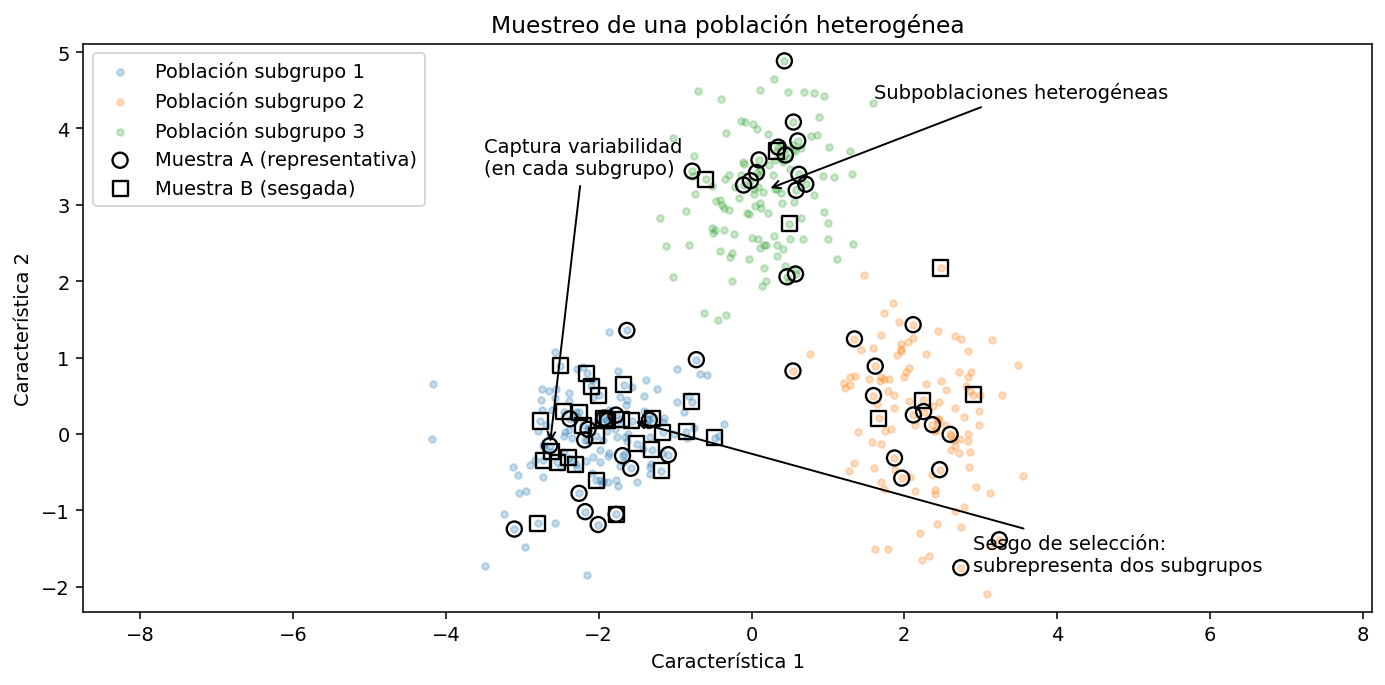

In [15]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(42)

# Generamos la población
# Tres subpoblaciones con medias y covarianzas distintas
N_per_cluster = [150, 120, 130]
means = np.array([[-2.0, 0.0], [2.2, 0.2], [0.2, 3.2]])
covs = [
    np.array([[0.5, 0.1], [0.1, 0.4]]),
    np.array([[0.4, -0.15], [-0.15, 0.6]]),
    np.array([[0.3, 0.0], [0.0, 0.5]]),
]

clusters = []
labels = []
for k, (n, mu, cov) in enumerate(zip(N_per_cluster, means, covs)):
    pts = rng.multivariate_normal(mu, cov, size=n)
    clusters.append(pts)
    labels.extend([k] * n)

X = np.vstack(clusters)
labels = np.array(labels)
idx = [np.where(labels == k)[0] for k in range(3)]

# Muestra Representativa
frac = 0.12
sample_A_idx = np.hstack([
    rng.choice(i, size=max(1, int(len(i) * frac)), replace=False)
    for i in idx
])

# Muestra Sesgada (casi toda de un solo subgrupo)
biased_sizes = [int(len(idx[0]) * 0.20), 4, 3]
sample_B_idx = np.hstack([
    rng.choice(i, size=min(len(i), s), replace=False)
    for i, s in zip(idx, biased_sizes)
])

# Graficos
fig, ax = plt.subplots(figsize=(10, 5), dpi=140)

# Población completa (puntos pequeños)
for k in range(3):
    ax.scatter(
        X[idx[k], 0], X[idx[k], 1],
        s=12, alpha=0.25, label=f"Población subgrupo {k+1}"
    )

# Muestra representativa
ax.scatter(
    X[sample_A_idx, 0], X[sample_A_idx, 1],
    s=60, marker='o', facecolors='none', edgecolors='black',
    linewidths=1.2, label="Muestra A (representativa)"
)

# Muestra sesgada
ax.scatter(
    X[sample_B_idx, 0], X[sample_B_idx, 1],
    s=60, marker='s', facecolors='none', edgecolors='black',
    linewidths=1.2, label="Muestra B (sesgada)"
)

# Anotaciones
ax.annotate(
    "Subpoblaciones heterogéneas",
    xy=means[2], xytext=(means[2][0] + 1.4, means[2][1] + 1.2),
    arrowprops=dict(arrowstyle="->", lw=1.0)
)

ax.annotate(
    "Captura variabilidad\n(en cada subgrupo)",
    xy=X[sample_A_idx[0], 0:2],
    xytext=(-3.5, 3.4),
    arrowprops=dict(arrowstyle="->", lw=1.0),
    ha='left'
)

ax.annotate(
    "Sesgo de selección:\nsubrepresenta dos subgrupos",
    xy=X[sample_B_idx[0], 0:2],
    xytext=(2.9, -1.8),
    arrowprops=dict(arrowstyle="->", lw=1.0),
    ha='left'
)

# Formato final
ax.set_title("Muestreo de una población heterogénea")
ax.set_xlabel("Característica 1")
ax.set_ylabel("Característica 2")
ax.legend(loc="upper left", frameon=True)
ax.set_aspect('equal', adjustable='datalim')
ax.margins(0.1)
plt.tight_layout()
plt.show()


## Muestreo experimental vs computacional — Dos sentidos del *muestreo*

### Muestreo **experimental**

Proceso de **recolección de datos** a partir de una **población o fenómeno real**.

* Se realiza **antes del análisis**.
* Define **qué datos existen** y **qué tan representativos son**.
* Determina la **calidad estadística** y la **validez biológica** del estudio.
* Ejemplo:

  * Seleccionar individuos de distintas poblaciones naturales.
  * Tomar muestras de tejidos o secuencias genómicas en un experimento.

**Objetivo:** obtener una **muestra representativa del mundo real**.

### Muestreo **en análisis de datos**

Subdivisión o selección de datos **ya disponibles** para tareas computacionales.

* Se realiza **después de tener el dataset completo**.
* Permite **entrenar, validar o probar** modelos de predicción.
* No cambia la información original, pero **controla el uso de los datos**.
* Ejemplo:

  * Separar datos en *train*, *validation* y *test sets*.
  * Aplicar *bootstrap* o *cross-validation* para estimar la variabilidad del modelo.

**Objetivo:** obtener **subconjuntos de datos comparables y no sesgados** para evaluar desempeño predictivo.

### Comparación

| Aspecto       | Muestreo experimental                      | Muestreo en análisis de datos         |
| ------------- | ------------------------------------------ | ------------------------------------- |
| **Momento**   | Antes del análisis                         | Después de tener el dataset           |
| **Propósito** | Obtener datos representativos del fenómeno | Evaluar o entrenar modelos            |
| **Control**   | Sobre la recolección                       | Sobre el uso y partición de datos     |
| **Riesgo**    | Sesgo de selección biológico o ambiental   | Sobreajuste o validación inadecuada   |
| **Ejemplo**   | Diseñar un experimento de campo            | Separar datos en entrenamiento y test |


## Técnicas de muestreo

### Muestreo aleatorio simple

El **muestreo aleatorio simple (MAS)** es el método más básico y fundamental:

- Cada elemento de la población tiene **la misma probabilidad de ser seleccionado**.

---

### Características principales

* Se eligen **k unidades** de manera completamente **aleatoria**.
* No se requiere conocer información previa sobre la población.
* Garantiza una muestra **imparcial y representativa**, si el tamaño es adecuado.

---

### Tipos de muestreo aleatorio

| Tipo              | Descripción                                                      | Ejemplo / Implicancia                                                       |
| ----------------- | ---------------------------------------------------------------- | --------------------------------------------------------------------------- |
| **Con reemplazo** | Una misma unidad puede ser seleccionada varias veces.            | Seleccionar células de una placa con reposición después de cada extracción. |
| **Sin reemplazo** | Una vez elegida una unidad, **no puede volver a seleccionarse**. | Elegir pacientes distintos para un ensayo clínico.                          |


*Cuando la población es muy grande en relación con la muestra, ambos métodos producen resultados casi idénticos.*

### Generación de muestras aleatorias en python

In [16]:
import numpy as np

population = np.arange(100)

sample_without_replacement = np.random.choice(
  a = population,
  size = 9,
  replace = False
)

all_different = len(np.unique(sample_without_replacement)) == 99

print(
  "Todos los elementos son diferentes en la muestra sin reemplazo? : "
  f"{all_different}"
)

sample_with_replacement = np.random.choice(
  a = population,
  size = 9,
  replace = True
)
all_different = len(np.unique(sample_with_replacement)) == 99

print(
  "Todos los elementos son diferentes en la muestra con reemplazo? : "
  f"{all_different}"
)


Todos los elementos son diferentes en la muestra sin reemplazo? : True
Todos los elementos son diferentes en la muestra con reemplazo? : False


In [ ]:
# Se puede usar con elementos no numéricos también.
population = [
  "lunes",
  "martes",
  "miercoles",
  "jueves",
  "viernes",
  "sábado",
  "domingo"
]
np.random.choice(
  a = population,
  size = 5,
  replace = True
)

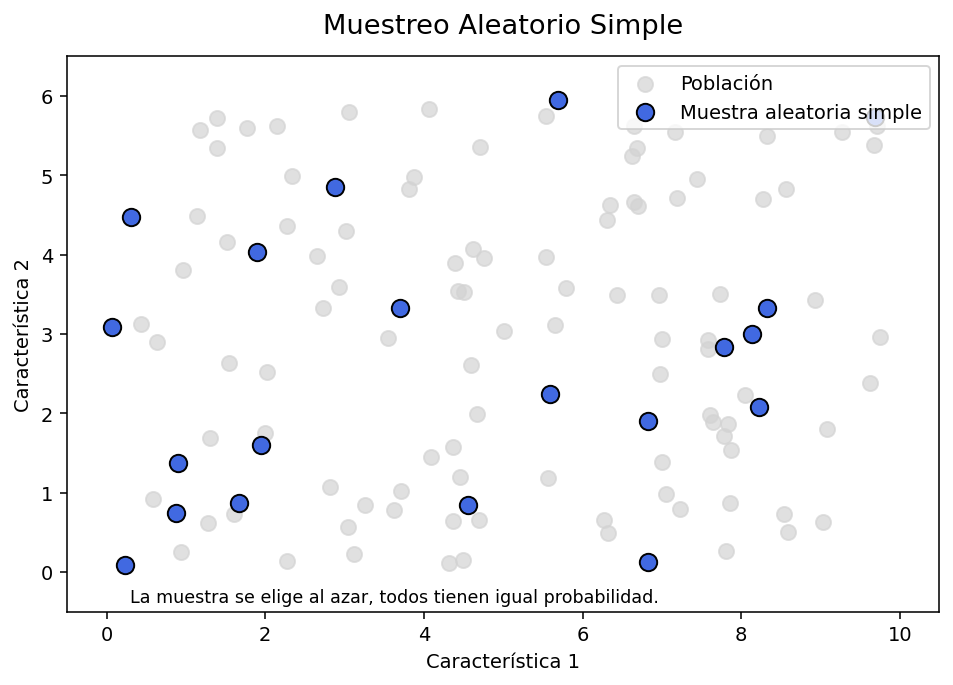

In [24]:
import numpy as np
import matplotlib.pyplot as plt

N = 120             # tamaño de la población
sample_size = 20    # tamaño de la muestra

# Generamos la población como puntos distribuidos en un área
rng = np.random.default_rng(42)
x = rng.uniform(0, 10, N)
y = rng.uniform(0, 6, N)

# Seleccionamos una muestra aleatoria simple (sin reemplazo)
sample_idx = rng.choice(np.arange(N), size=sample_size, replace=False)

fig, ax = plt.subplots(figsize=(10, 5), dpi=140)

# Población completa
ax.scatter(x, y, s=60, color="lightgray", alpha=0.7, label="Población")

# Muestra seleccionada (resaltada)
ax.scatter(
  x[sample_idx], y[sample_idx], s=80, color="royalblue",
  edgecolor="black", label="Muestra aleatoria simple"
)

# Opcional: líneas o rectángulos para destacar un área visual
ax.set_xlim(-0.5, 10.5)
ax.set_ylim(-0.5, 6.5)
ax.set_aspect("equal")

# Anotaciones y estilo
ax.set_title("Muestreo Aleatorio Simple", fontsize=14, pad=12)
ax.set_xlabel("Característica 1")
ax.set_ylabel("Característica 2")

ax.legend(frameon=True, loc="upper right")
ax.text(0.3, -0.2, "La muestra se elige al azar, todos tienen igual probabilidad.",
        fontsize=9, ha="left", va="top")

plt.tight_layout()
plt.show()


## Muestreo sistemático

### ¿En qué consiste?

El **muestreo sistemático** selecciona elementos **a intervalos regulares** dentro de una población previamente **ordenada** según una variable de interés.

### Procedimiento

1. **Ordenar** los elementos de la población (por ejemplo, por tiempo, tamaño o posición).
1. **Elegir aleatoriamente un punto de inicio**.
1. **Seleccionar cada k-ésimo elemento** hasta completar el tamaño deseado de la muestra.

Una vez elegido el primer elemento, el resto queda determinado por el intervalo fijo.

### Ventajas

* Asegura que las observaciones estén **distribuidas a lo largo de todo el rango** de la variable.
* Fácil de implementar y comprender.

### Precauciones

* Si la variable tiene **patrones periódicos**, el muestreo puede **no capturar la variabilidad real**:

  * Ejemplo: medir cada 10° en una señal que se repite cada 20° → sesgo por sincronización.


### Generación de muestras sistemáticas en python

- En este ejemplo vamoas a usar el conjunto de datos de **iris**.
  - Tamaño (ancho y largo) de pétalo y sépalo tres variantes de plantas.
- Vamos a ordenar según el largo de sus pétalos:

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np

iris = datasets.load_iris(as_frame=True)
df = iris.frame
df.head()

In [ ]:
df = df.sort_values(
  by="petal length (cm)",
)

sample_size = 17 # Aprox...
print(f"El tamaño de la muestra es {sample_size}")
spacing = int(round(len(df) / sample_size))
print(f"Los elementos estan espaciados cada {spacing} posiciones")
starting_position = np.random.randint(low=0, high=spacing-1)
print(f"Elijo una posición de inicio aleatoria: {starting_position}")
selected_positions = np.arange(len(df)) % spacing == starting_position
sample = df.iloc[selected_positions, :]
print(f"El tamaño real de la muestra es {len(sample)}")
sample


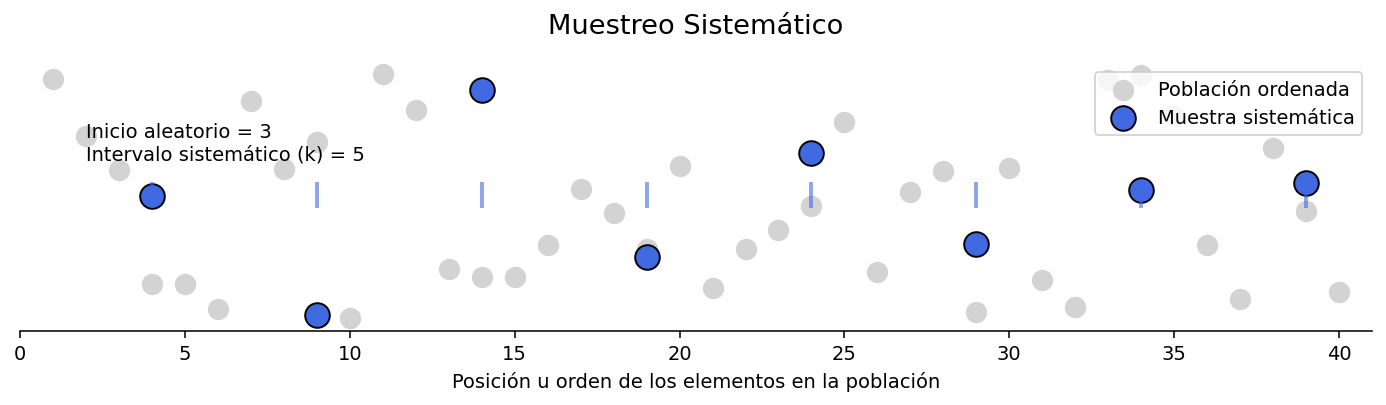

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
N = 40              # tamaño total de la población
n = 8               # tamaño de la muestra
k = N // n          # intervalo sistemático
np.random.seed(42)

# Población (ordenada)
poblacion = np.arange(1, N + 1)

# Elegimos un punto inicial aleatorio dentro del primer intervalo
inicio = np.random.randint(0, k)
muestra_idx = np.arange(inicio, N, k)

# ----- Figura -----
fig, ax = plt.subplots(figsize=(10, 3), dpi=140)

# Población total (puntos grises)
ax.scatter(
  poblacion, np.random.uniform(-1, 1, len(poblacion)),
  s=100, color='lightgray', label="Población ordenada"
)

# Muestra seleccionada (puntos azules)
ax.scatter(
  poblacion[muestra_idx],
  np.random.uniform(-1, 1, len(muestra_idx)),
  s=160, color='royalblue', edgecolor='black', label="Muestra sistemática"
)

# Líneas verticales para marcar los elementos elegidos
for idx in muestra_idx:
    ax.vlines(x=poblacion[idx], ymin=-0.1, ymax=0.1, color='royalblue', lw=2, alpha=0.6)

# Texto explicativo
ax.text(
  N * 0.05, 0.25,
  f"Inicio aleatorio = {inicio}\nIntervalo sistemático (k) = {k}",
  fontsize=10, ha='left', va='bottom'
)

# Estética
ax.set_title("Muestreo Sistemático", fontsize=14, pad=15)
ax.set_xlabel("Posición u orden de los elementos en la población")
ax.set_yticks([])
ax.set_xlim(0, N + 1)
ax.legend(loc="upper right", frameon=True)
ax.spines[['left', 'top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()


## Muestreo estratificado

### ¿Qué es?

El **muestreo estratificado** consiste en **dividir la población en grupos homogéneos** llamados **estratos**,
y luego **extraer muestras dentro de cada uno**.


### Idea principal

- Cada estrato es **internamente homogéneo**,
- pero **diferente de los otros** en alguna característica relevante.

* Los estratos son **mutuamente excluyentes** y **colectivamente exhaustivos**:

  * Cada individuo pertenece a **un solo estrato**.
  * **Nadie queda sin clasificar.**

Ejemplos:

* Población de pacientes estratificada por edad o sexo.
* Población de genes estratificada por función o expresión.
* Dataset de flores (*Iris*) estratificado por especie.

### Procedimiento

1️⃣ Dividir la población según una variable relevante (p. ej. especie, grupo etario).
2️⃣ Aplicar dentro de cada estrato un **muestreo aleatorio simple o sistemático**.
3️⃣ Combinar los resultados para obtener la muestra total.

### Estrategias de asignación

| Tipo de asignación | Criterio                                                                              | Características / Uso                                                                 |
| ------------------ | ------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------- |
| **Proporcional**   | Muestra en cada estrato proporcional al tamaño del estrato en la población.           | Preserva las proporciones reales.                                                     |
| **Óptima**         | Muestra proporcional a la **variabilidad interna** (desviación estándar) del estrato. | Favorece los estratos más variables; más eficiente estadísticamente.                  |
| **Uniforme**       | Igual número de casos por estrato.                                                    | Facilita comparaciones entre grupos (ejemplo: *dataset Iris*, 50 flores por especie). |


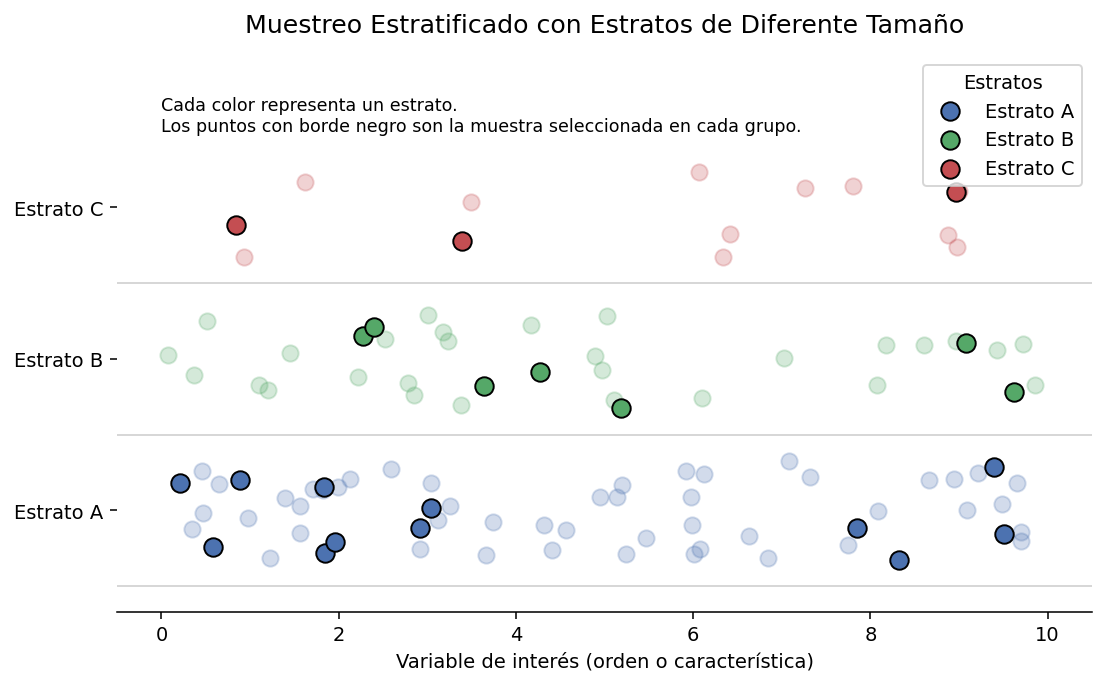

In [35]:
# ===============================================================
# Ejemplo visual: Muestreo Estratificado con estratos de distinto tamaño
# ===============================================================

import numpy as np
import matplotlib.pyplot as plt

# Semilla para reproducibilidad
np.random.seed(42)

# ----- 1) Definir los estratos -----
estratos = {
  "Estrato A": {"color": "#4C72B0", "n": 60, "range": [0, 10]},
  "Estrato B": {"color": "#55A868", "n": 35, "range": [0, 10]},
  "Estrato C": {"color": "#C44E52", "n": 15, "range": [0, 10]},
}

# Coordenadas para cada estrato
y_base = 0
data = []

for i, (nombre, props) in enumerate(estratos.items()):
  n = props["n"]
  r = props["range"]
  x = np.random.uniform(r[0], r[1], n)
  y = np.random.uniform(y_base, y_base + 1, n)
  data.append((nombre, x, y, props["color"]))
  y_base += 1.5  # espacio entre estratos

# Muestra estratificada (proporcional)
muestra_idx = []
for nombre, x, y, color in data:
    n_total = len(x)
    n_muestra = max(2, int(n_total * 0.2))  # 20% de cada estrato
    muestra_idx.append(np.random.choice(np.arange(n_total), n_muestra, replace=False))

# Graficar
fig, ax = plt.subplots(figsize=(8, 5), dpi=140)

for (nombre, x, y, color), idx in zip(data, muestra_idx):
    # Población completa (gris claro)
    ax.scatter(x, y, s=70, color=color, alpha=0.25)
    # Muestra seleccionada (resaltada)
    ax.scatter(x[idx], y[idx], s=90, edgecolor='black', facecolor=color, label=f"{nombre}")

# Líneas divisorias entre estratos
for i in range(len(estratos)):
    ax.axhline(i * 1.5 - 0.25, color='gray', lw=0.8, alpha=0.4)

# Formato final
ax.set_title("Muestreo Estratificado con Estratos de Diferente Tamaño", fontsize=13, pad=12)
ax.set_xlabel("Variable de interés (orden o característica)")
ax.set_yticks([0.5, 2.0, 3.5])
ax.set_yticklabels([list(estratos.keys())[0], list(estratos.keys())[1], list(estratos.keys())[2]])
ax.set_xlim(-0.5, 10.5)
ax.set_ylim(-0.5, 5.0)
ax.spines[['top', 'right', 'left']].set_visible(False)
ax.legend(title="Estratos", loc="upper right", frameon=True)

ax.text(0, 4.6, "Cada color representa un estrato.\nLos puntos con borde negro son la muestra seleccionada en cada grupo.",
        fontsize=9, va='top', ha='left')

plt.tight_layout()
plt.show()


Ejercicio:
- Se quiere construir un set de datos similar a Iris, pero en lugar de 150
  muestras con 100.
- Se quiere que la asignación sea:
  1. proporcional
  2. óptima con respecto al largo del pétalo.
- ¿Cuántos elementos de cada especie deberían recolectarse en cada caso?

## Descripción cuantitativa (Estadísticos de resumen)

### (Estadísticos de resumen)

Los **estadísticos de resumen** permiten **describir cuantitativamente** cómo se distribuyen los datos de una muestra.

- Resumen numérico del comportamiento de una variable:
- tendencia, variabilidad y forma de su distribución.

### Tipos principales

| Tipo                  | Qué mide                                          | Ejemplos                                                   |
| --------------------- | ------------------------------------------------- | ---------------------------------------------------------- |
| **Tendencia central** | Valor típico o representativo de la distribución. | Media, mediana, moda.                                      |
| **Dispersión**        | Cuánto se alejan los datos entre sí.              | Varianza, desviación estándar, rango intercuartílico, MAD. |
| **Forma**             | La estructura de la distribución.                 | Asimetría (*skewness*), apuntamiento (*kurtosis*).         |

### Concepto clave

Cada estadístico resume **una dimensión diferente** del comportamiento de una variable aleatoria.

Distribución = Tendencia central + Dispersión + Forma



### Robustez

Algunos estadísticos son **robustos**, es decir:

* No se ven fuertemente afectados por valores atípicos.
* Funcionan bien en distintos tipos de distribuciones.

*Ejemplo:* la **mediana** es más robusta que la **media** ante outliers.


### Comparación conceptual

| Aspecto                                          | Estadísticos **robustos**                       | Estadísticos **no robustos**                                                   |
| ------------------------------------------------ | ----------------------------------------------- | ------------------------------------------------------------------------------ |
| **Sensibilidad a valores extremos**              | Baja → ignoran o reducen el efecto de outliers. | Alta → los valores extremos influyen fuertemente.                              |
| **Comportamiento en distribuciones no normales** | Más estables.                                   | Menos confiables.                                                              |
| **Eficiencia en distribuciones normales**        | Ligeramente menor.                              | **Más eficientes y precisos** si los datos siguen una **distribución normal**. |
| **Usos típicos**                                 | Datos reales con posibles outliers o sesgos.    | Datos experimentales bien controlados o simulaciones teóricamente normales.    |


### La ventaja de los estadísticos no robustos

Los estadísticos **no robustos** (como la **media**, la **varianza**, la **desviación estándar**)
pueden ser **más informativos y eficientes** cuando:

1. **Los datos son limpios y siguen una distribución teórica conocida**, como la normal.

   * En este caso, la media es el estimador de máxima verosimilitud del parámetro poblacional μ.
   * La varianza es el estimador más eficiente de σ².

2. **Se busca modelar o comparar poblaciones** bajo supuestos estadísticos fuertes.

   * Las pruebas t, ANOVA y regresión lineal clásica asumen normalidad y usan estadísticos no robustos.

3. **Se desea sensibilidad a cambios reales en los valores extremos.**

   * En física, química o biología molecular, los valores extremos pueden ser **datos informativos** (picos de expresión, actividad enzimática, etc.), no errores.
   * Un estadístico robusto podría “ocultarlos”.



### Estadísticos de tendencia central

Los estadísticos más comunes de este tipo:
- la *media*
  - Es el promedio aritmético de un conjunto de datos.
  - $\bar{X} = \frac{1}{N}\times{\sum_{i=1}^N{x_i}}$
  - No es robusto.
- La *mediana*.
  - Es el valor ubicado en el percentil 50 de una distribución.
  - Es un estimador robusto
  - Puede calcularse en datos categóricos ordinales
- La *moda*
  - Es el valor más frecuente
    - es el único estadístico de tendencia central para datos nominales
  - Difícil de estimar correctamente para variables continuas.

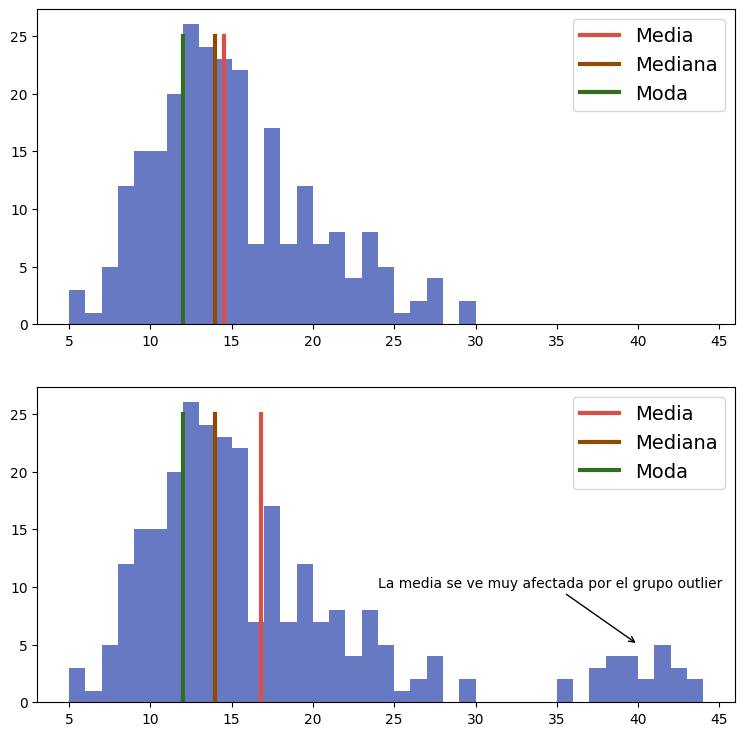

In [19]:
import C01
C01.mean_mode_median()


In [ ]:
import pandas as pd
import numpy as np

# Creamos un DataFrame de ejemplo
data = {
  "altura_cm": [170, 165, 180, 175, 172, 168, 185, 177, 176, 180],
  "peso_kg": [70, 65, 80, 75, 72, 68, 85, 77, 76, 82],
}

df = pd.DataFrame(data)

# Mostramos los primeros valores
print("Datos de ejemplo:")
print(df, "\n")

# Cálculo de estadísticos de resumen

# Media (promedio aritmético)
media = df.mean(numeric_only=True)

# Mediana (percentil 50)
mediana = df.median(numeric_only=True)

# Moda (valor más frecuente)
moda = df.mode(numeric_only=True).iloc[0]  # .iloc[0] devuelve la primera moda si hay varias

# Mostramos los resultados
print("Estadísticos de resumen")
print("----------------------------")
print(f"Media:\n{media}\n")
print(f"Mediana:\n{mediana}\n")
print(f"Moda:\n{moda}\n")


Datos de ejemplo:
   altura_cm  peso_kg
0        170       70
1        165       65
2        180       80
3        175       75
4        172       72
5        168       68
6        185       85
7        177       77
8        176       76
9        180       82 

Estadísticos de resumen
----------------------------
Media:
altura_cm    174.8
peso_kg       75.0
dtype: float64

Mediana:
altura_cm    175.5
peso_kg       75.5
dtype: float64

Moda:
altura_cm    180.0
peso_kg       65.0
Name: 0, dtype: float64



In [21]:
# Moda en datos categóricos nominales
import pandas as pd

# Datos de ejemplo: especie de flor
df = pd.DataFrame({
    "especie": [
        "setosa", "versicolor", "setosa", "virginica",
        "setosa", "versicolor", "setosa", "versicolor"
    ]
})

# Moda: categoría más frecuente
moda = df["especie"].mode().iloc[0]

print("Moda categórica (nominal):", moda)


Moda categórica (nominal): setosa


In [22]:
# Mediana y moda en datos categóricos ordinales
import pandas as pd

# Datos de ejemplo: nivel de expresión génica
niveles = pd.Categorical(
    ["bajo", "medio", "medio", "alto", "bajo", "medio", "alto", "medio"],
    categories=["bajo", "medio", "alto"],  # orden explícito
    ordered=True
)

df = pd.DataFrame({"expresion": niveles})

# Moda: el nivel más frecuente
moda = df["expresion"].mode().iloc[0]

# Mediana: el nivel central en el orden definido
mediana = df["expresion"].sort_values().iloc[len(df) // 2]

print("Moda categórica (ordinal):", moda)
print("Mediana categórica (ordinal):", mediana)


Moda categórica (ordinal): medio
Mediana categórica (ordinal): medio


## Estadísticos de dispersión

- La *desviación estándar*
  - es el más popular
  - No es un estimador robusto.
  - $s=\sqrt{\frac{\sum_{i=1}^N{(x_i-\bar{x})^2}}{N-1}}$
  - Varianza: $s^2$
- El rango entre cuartiles:
  - Es la diferencia entre el tercer cuartil y el primer cuartil.
  - $Q_3 - Q_1$
- La desviación mediana absoluta **Median Absolute Deviation** (MAD).
  - Es análogo a la desviación estandard utilizando la mediana
  - $median(|X_i-median(X)|)$
- El rango:
  - Es la diferencia entre el valor máximo y mínimo.

## Estadísticos de dispersión

Los **estadísticos de dispersión** cuantifican **cuánto varían los datos** respecto a su valor central.

Miden la **“amplitud” o “variabilidad”** de una distribución.



### Principales medidas

| Estadístico | Fórmula / Definición | Qué mide | Robustez |
| ----------- | -------------------- | -------- | -------- |
| **Desviación estándar (s)** | $s = \sqrt{\frac{\sum_{i=1}^N (x_i - \bar{x})^2}{N-1}}$ | Variabilidad promedio respecto a la media. | No robusto |
| **Varianza (s²)** | $ s^2 $ | Dispersión al cuadrado. | No robusta. |
| **Rango intercuartílico (IQR)** | $Q_3 - Q_1$ | Amplitud de los valores centrales (50% de los datos). | Robusto. |
| **Desviación mediana absoluta (MAD)** | $ \text{mediana}(\|X_i-\text{mediana}(X)\|)$ | Dispersión basada en la mediana. | Muy robusto. |
| **Rango total** | $\text{max}(X)-\text{min}(X)$ | Diferencia entre valores extremos. | Muy sensible a outliers. |

### Interpretación

* Una **dispersión baja** indica datos concentrados alrededor de la media o mediana.
* Una **dispersión alta** indica gran variabilidad o presencia de valores extremos.

**Regla práctica:**

* Usar **desviación estándar** cuando los datos son normales y sin outliers.
* Usar **IQR** o **MAD** cuando los datos son asimétricos o tienen valores extremos.

In [28]:
import pandas as pd
import numpy as np

# Creamos un DataFrame de ejemplo
data = {
  "altura_cm": [170, 165, 180, 175, 172, 168, 185, 177, 176, 300],  # incluye un outlier
}
df = pd.DataFrame(data)

print("Datos:")
print(df, "\n")

# ---------------------------------------------------------------
# Desviación estándar (no robusta)
std = df["altura_cm"].std()

# Rango intercuartílico (IQR)
q3 = df["altura_cm"].quantile(0.75)
q1 = df["altura_cm"].quantile(0.25)
iqr = q3 - q1

# Desviación mediana absoluta (MAD)
mad = (df["altura_cm"] - df["altura_cm"].median()).abs().median()

# Rango total
range_total = df["altura_cm"].max() - df["altura_cm"].min()

# ---------------------------------------------------------------
# Mostrar resultados
print("Estadísticos de dispersión")
print("------------------------------")
print(f"Desviación estándar: {std:.2f}")
print(f"Rango intercuartílico (IQR): {iqr:.2f}")
print(f"Desviación mediana absoluta (MAD): {mad:.2f}")
print(f"Rango total: {range_total:.2f}")


Datos:
   altura_cm
0        170
1        165
2        180
3        175
4        172
5        168
6        185
7        177
8        176
9        300 

Estadísticos de dispersión
------------------------------
Desviación estándar: 40.20
Rango intercuartílico (IQR): 8.75
Desviación mediana absoluta (MAD): 5.00
Rango total: 135.00


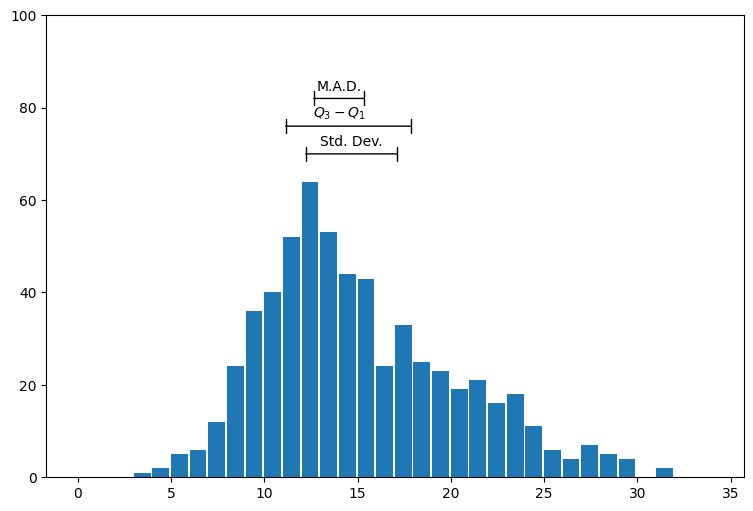

In [29]:
import C01
C01.dispersion_measures()

## Estadísticos de forma

Las **medidas de forma** describen **la estructura y simetría** de una distribución:

- Indican si los datos se agrupan, se extienden o se sesgan hacia un lado.


### Asimetría (*Skewness*)

Mide **el grado de simetría** de la distribución respecto a la media.

$ \text{Skewness} = \frac{1}{N} \sum_{i=1}^{N} \left( \frac{x_i - \bar{x}}{s} \right)^3 $

| Tipo de asimetría | Descripción | Ejemplo visual / Interpretación           |
| ----------------- | ----------- | ----------------------------------------- |
| **Simétrica**     | Los datos se distribuyen igual a ambos lados de la media. | Media ≈ Mediana                           |
| **Asimetría positiva (Skew > 0)** | Cola más larga a la **derecha** → algunos valores altos.       | Ej: ingresos, tamaños poblacionales.      |
| **Asimetría negativa (Skew < 0)** | Cola más larga a la **izquierda** → algunos valores muy bajos. | Ej: edad al morir en poblaciones jóvenes. |

* Skew ≈ 0 → distribución simétrica
* Skew > 0 → sesgo hacia valores grandes
* Skew < 0 → sesgo hacia valores pequeños


### Curtosis (*Kurtosis*)

Mide **la concentración de datos alrededor de la media**
y la **pesadez de las colas** de la distribución.

$ \text{Kurtosis} = \frac{1}{N} \sum_{i=1}^{N} \left( \frac{x_i - \bar{x}}{s} \right)^4 $

donde:

* $ N $ → número de observaciones
* $ x_i $ → cada valor de la muestra
* $ \bar{x} $ → media muestral
* $ s $ → desviación estándar muestral


| Tipo de curtosis | Exceso de kurtosis | Características                          |
| ---------------- | ------------------ | ---------------------------------------- |
| **Mesocúrtica**  | ≈ 0                | Similar a la distribución normal.        |
| **Leptocúrtica** | > 0                | Colas pesadas, más valores extremos.     |
| **Platicúrtica** | < 0                | Colas ligeras, más valores en el centro. |

*Exceso de curtosis:*

$ \text{Kurtosis}_{exceso} = \text{Kurtosis} - 3 $


### Interpretación conjunta

* **Skewness** describe la **dirección del sesgo**.
* **Kurtosis** describe la **forma del pico y el peso de las colas**.
* Combinadas, ofrecen una visión completa de **la forma de la distribución**.


In [ ]:
# Cálculo de Asimetría (Skewness) y Curtosis con pandas

import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

# Generamos tres distribuciones de ejemplo
np.random.seed(42)
data = {
  "normal": np.random.normal(loc=0, scale=1, size=1000),        # distribución simétrica
  "sesgada_derecha": np.random.exponential(scale=1, size=1000), # asimetría positiva
  "colas_pesadas": np.random.standard_t(df=2, size=1000),       # curtosis alta (colas pesadas)
}

df = pd.DataFrame(data)

# Cálculo con pandas
skewness = df.skew()       # Asimetría
kurtosis_exceso = df.kurt()  # Curtosis (exceso = kurtosis - 3)

print("Estadísticos de forma (usando pandas)")
print("-----------------------------------------")
print("Asimetría (Skewness):")
print(skewness, "\n")

print("Curtosis (exceso):")
print(kurtosis_exceso, "\n")

# ---------------------------------------------------------------
# También se puede usar scipy.stats para más control
print("Con scipy.stats:")
for col in df.columns:
    sk = skew(df[col])
    kt = kurtosis(df[col])  # por defecto devuelve el exceso de curtosis
    print(f"{col:18s} → skew = {sk:6.3f}, kurtosis (exceso) = {kt:6.3f}")


Estadísticos de forma (usando pandas)
-----------------------------------------
Asimetría (Skewness):
normal              0.116976
sesgada_derecha     1.983789
colas_pesadas      11.062867
dtype: float64 

Curtosis (exceso):
normal               0.072562
sesgada_derecha      5.412459
colas_pesadas      251.375531
dtype: float64 

Con scipy.stats:
normal             → skew =  0.117, kurtosis (exceso) =  0.066
sesgada_derecha    → skew =  1.981, kurtosis (exceso) =  5.379
colas_pesadas      → skew = 11.046, kurtosis (exceso) = 250.114


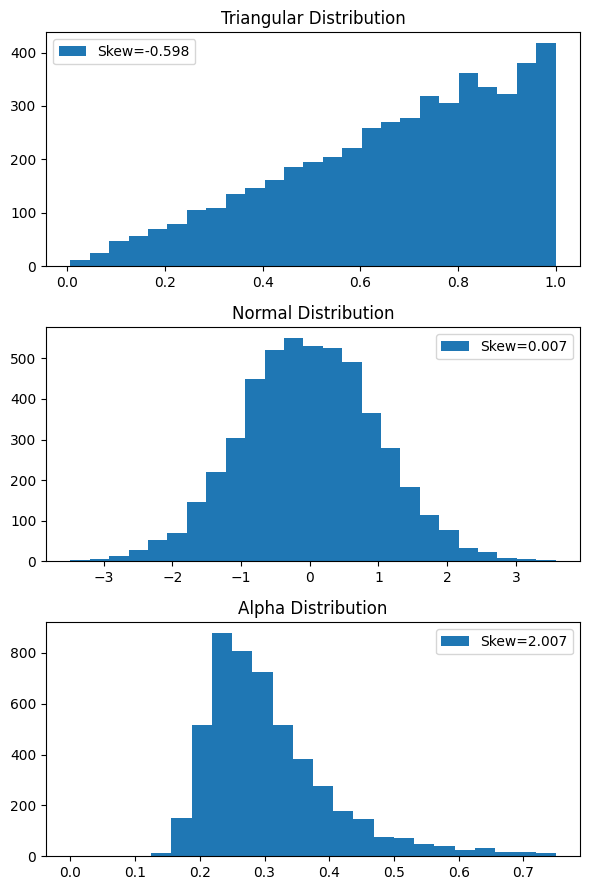

In [25]:
import C01
C01.skewness_plot()

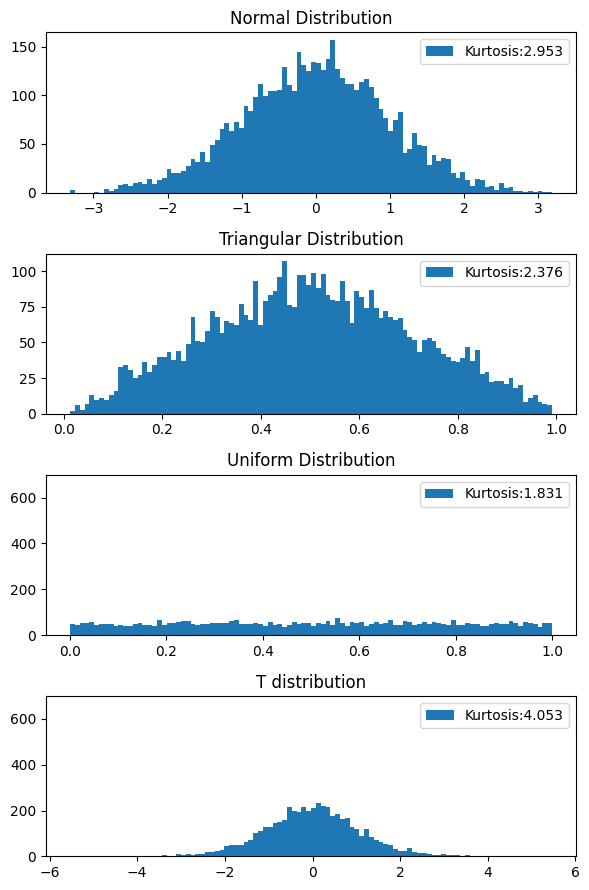

In [52]:
import C01
C01.kurtosis_plot()

## Descripción gráfica

### Histograma

Un **histograma** es una representación **gráfica de la distribución de frecuencias** de una variable **numérica continua o discreta**.

Muestra **cómo se distribuyen los datos** a lo largo de distintos intervalos de valores.

#### Cómo se construye

1. **Dividir el rango de valores** en intervalos contiguos llamados **bins**.
1. **Contar cuántas observaciones** caen dentro de cada bin.
1. **Representar esas frecuencias** con barras cuya altura indica la cantidad (o densidad) de datos.

Cada barra → intervalo

Altura → frecuencia o densidad de los valores en ese rango

#### Qué nos permite ver

* La **forma de la distribución** (simétrica, sesgada, bimodal, etc.)
* La **dispersión** de los datos.
* La presencia de **valores atípicos (outliers)**.
* La **tendencia central** y los **modos** (picos).

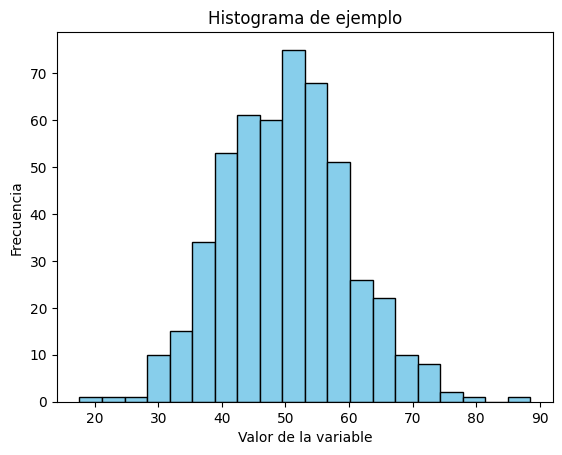

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo: distribución normal
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=500)

plt.hist(data, bins=20, color="skyblue", edgecolor="black")
plt.title("Histograma de ejemplo")
plt.xlabel("Valor de la variable")
plt.ylabel("Frecuencia")
plt.show()



### Estimadores de densidad por núcleo (Kernel Density Estimator, KDE)

#### Concepto general

El **estimador de densidad por núcleo (KDE)** genera una **curva continua y suave** que aproxima la **función de densidad de probabilidad** de una muestra.

Es una alternativa al histograma, pero sin depender del número ni del tamaño fijo de las barras.

Suele ser usado en superposición a un histograma.

### Idea intuitiva

* Cada observación se reemplaza por una **pequeña función de probabilidad** llamada **kernel**.
* Todas esas funciones se **superponen** para formar una **curva de densidad global**.
* Cuanto más ancho el kernel, más **suavizada** será la curva; cuanto más angosto, más **detallada**.

### Fórmula general

$ \hat{f}(x) = \frac{1}{n h}\sum_{i=1}^{n} K\left(\frac{x - x_i}{h}\right) $

donde:

* $ K $: función kernel (por defecto, la **normal estándar**).
* $ h $: **ancho de banda** o parámetro de suavizado.
* $ n $: número de observaciones.

### Parámetros principales

| Parámetro              | Significado                                                             | Efecto                                                                                     |
| ---------------------- | ----------------------------------------------------------------------- | ------------------------------------------------------------------------------------------ |
| **Kernel**             | Función de probabilidad local (gaussiana, uniforme, epanechnikov, etc.) | Controla la forma local de la suavización.                                                 |
| **Ancho de banda (h)** | Escala de suavizado                                                     | Si **h es pequeño**, la curva sigue mucho el ruido; si **h es grande**, se pierde detalle. |


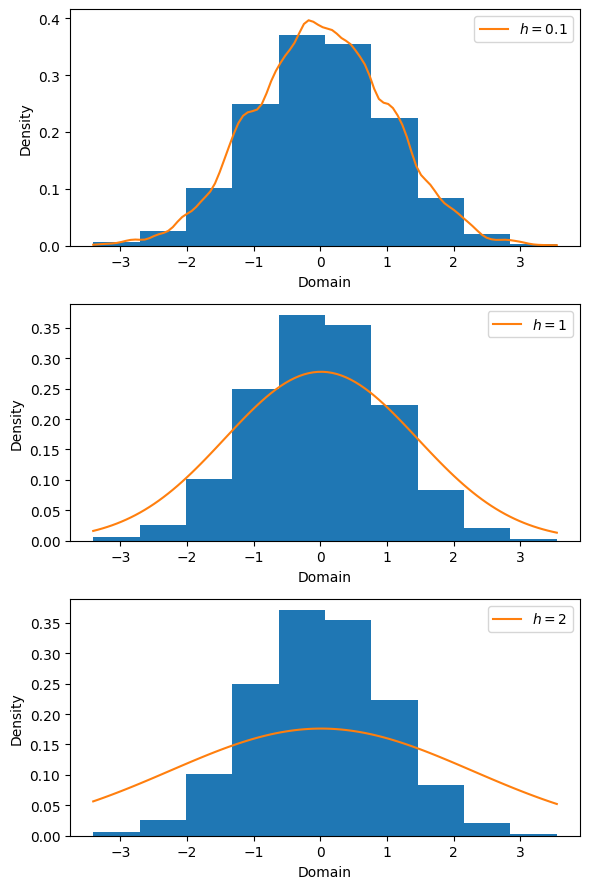

In [54]:
import C01
C01.kde_plot()

### Gráficos de barras (Barplots)

#### Concepto general

Los **gráficos de barras** representan comparaciones entre **categorías o grupos** mediante la **altura o longitud** de las barras.
Cada barra refleja el **valor promedio, suma o frecuencia** asociada a una categoría.

#### Características principales

* La **longitud de la barra** es proporcional al valor representado.
* Permite visualizar **diferencias absolutas** y **relativas** entre grupos.

### Variantes comunes

| Tipo de barplot        | Descripción                                 | Ejemplo de uso             |
| ---------------------- | ------------------------------------------- | -------------------------- |
| **Simple**             | Una variable categórica vs. valor numérico. | Media de peso por especie. |
| **Agrupado (grouped)** | Compara subcategorías dentro de cada grupo. | Peso por especie y sexo.   |
| **Apilado (stacked)**  | Suma de componentes dentro de cada barra.   | Composición porcentual.    |



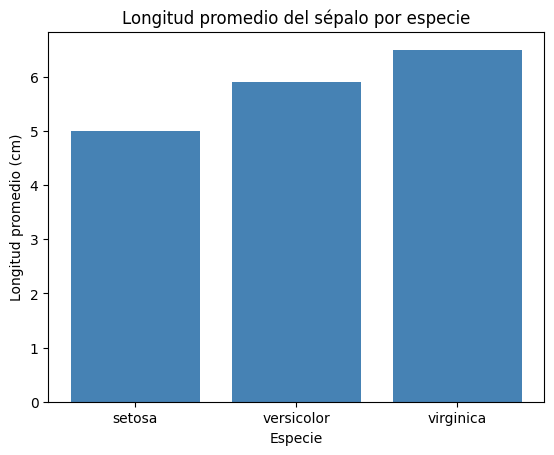

In [14]:

import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({
  "especie": ["setosa", "versicolor", "virginica"],
  "longitud_media": [5.0, 5.9, 6.5]
})

plt.bar(df["especie"], df["longitud_media"], color="steelblue")
plt.title("Longitud promedio del sépalo por especie")
plt.xlabel("Especie")
plt.ylabel("Longitud promedio (cm)")
plt.show()

### Diagramas de dispersión (Scatter Plots)

#### Concepto general

Un **diagrama de dispersión** representa la **relación entre dos variables cuantitativas** utilizando un sistema de **coordenadas cartesianas**.

Cada punto del gráfico corresponde a **una observación**:

* La **posición horizontal (x)** indica el valor de una variable.
* La **posición vertical (y)** indica el valor de la otra.

### Qué muestran

* La **distribución conjunta** de dos variables.
* La presencia de **patrones, correlaciones o agrupamientos**.
* Posibles **valores atípicos** (outliers) o relaciones no lineales.

### Extensiones del diagrama

Además de las coordenadas (x, y), es posible representar **más dimensiones** mediante:

* Forma del marcador
* Color
* Tamaño


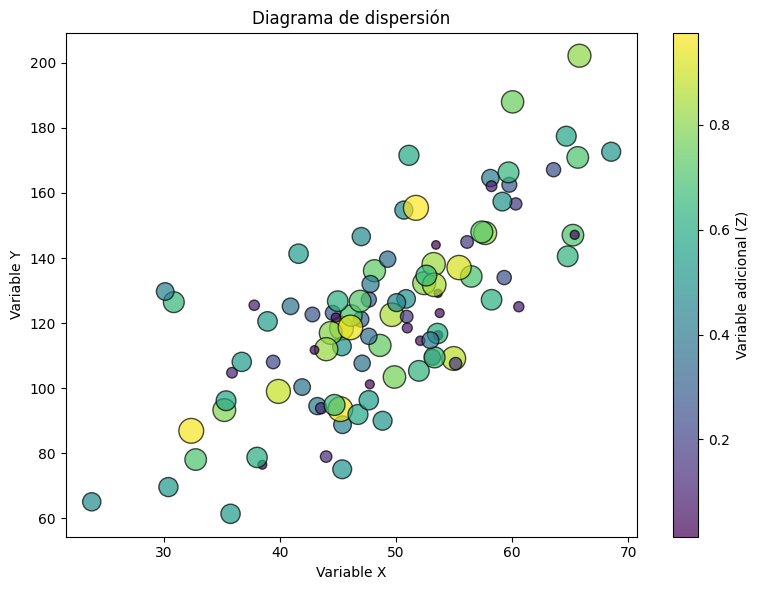

In [3]:
# Diagrama de dispersión con Matplotlib

import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
np.random.seed(42)
n = 100

# Dos variables correlacionadas
x = np.random.normal(50, 10, n)
y = 2.5 * x + np.random.normal(0, 20, n)

# Variable adicional para representar con color y tamaño
z = np.random.rand(n)        # variable entre 0 y 1
size = (z * 300) + 30        # tamaños de los puntos

# Crear figura
fig, ax = plt.subplots(figsize=(8, 6))

# Gráfico de dispersión
scatter = ax.scatter(
    x, y,
    c=z,                   # color según z
    s=size,                # tamaño según z
    cmap='viridis',        # mapa de color
    alpha=0.7,             # transparencia
    edgecolor='black'      # borde de puntos
)

# Etiquetas
ax.set_title("Diagrama de dispersión")
ax.set_xlabel("Variable X")
ax.set_ylabel("Variable Y")

# Barra de color (para la variable z)
cbar = plt.colorbar(scatter)
cbar.set_label("Variable adicional (Z)")

# Mostrar gráfico
plt.tight_layout()
plt.show()


### Matriz de dispersión (Scatter Matrix)

#### Concepto general

La **matriz de dispersión** es una colección de **diagramas de dispersión bivariados** entre todas las variables numéricas de un conjunto de datos.
Permite explorar **relaciones, correlaciones y patrones multivariados** de forma simultánea.

#### Características principales

* Cada celda muestra un **diagrama de dispersión** entre un par de variables.
* La **diagonal** suele mostrar la **distribución univariada** (histogramas o densidades).


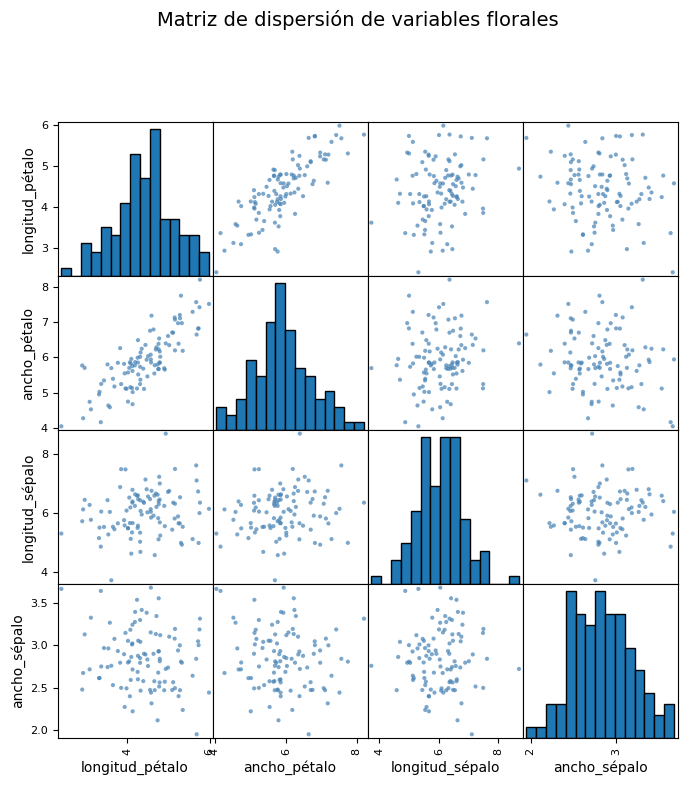

In [11]:
# Matriz de dispersión (Scatter Matrix) con pandas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generamos un conjunto de datos de ejemplo
np.random.seed(42)
n = 100

lp = np.random.normal(4.5, 0.8, n)
data = {
    "longitud_pétalo": lp,
    "ancho_pétalo": np.random.normal(1.5, 0.5, n) + lp,
    "longitud_sépalo": np.random.normal(6.0, 0.7, n),
    "ancho_sépalo": np.random.normal(2.8, 0.4, n),
}

df = pd.DataFrame(data)

# Creamos la matriz de dispersión
pd.plotting.scatter_matrix(
    df,
    figsize=(8, 8),
    diagonal='hist',       # en la diagonal se muestran histogramas
    color='steelblue',
    alpha=0.7,
    hist_kwds={'bins': 15, 'edgecolor': 'black'}
)

plt.suptitle("Matriz de dispersión de variables florales", y=1.02, fontsize=14)
plt.show()


### Histogramas bivariados

#### Concepto general

El **histograma bivariado** extiende el histograma tradicional a **dos variables numéricas**.
Permite visualizar cómo se distribuyen los datos en el **plano XY**, mostrando la **frecuencia conjunta** de observaciones dentro de celdas o regiones.

#### Construcción

1. Se dividen los ejes **X** y **Y** en intervalos (bins).
2. Cada intersección de bins forma un **rectángulo** que representa una región del espacio de datos.
3. La **altura o el color** del rectángulo indica **cuántas observaciones** caen en esa región.

#### Interpretación

* Las zonas **más oscuras o intensas** indican **mayor densidad de puntos**.
* Permite identificar **patrones de dependencia** o **acumulaciones** entre variables.
* Es una herramienta útil cuando los **diagramas de dispersión** se saturan por alta densidad de datos.

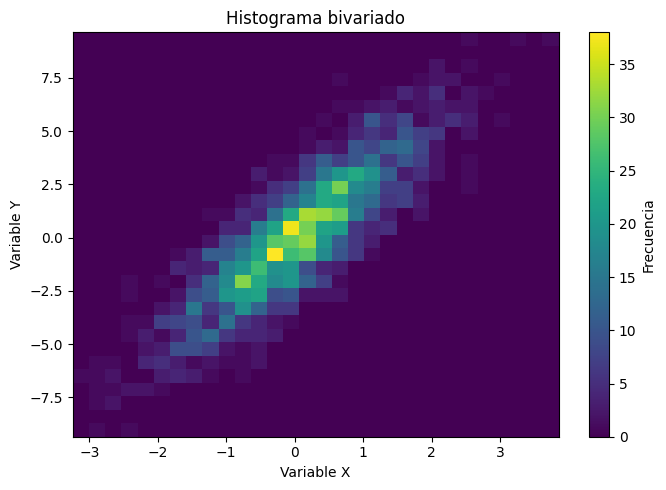

In [16]:
# Histograma bivariado con matplotlib

import numpy as np
import matplotlib.pyplot as plt

# Generar datos de ejemplo
np.random.seed(42)
n = 2000

# Dos variables correlacionadas
x = np.random.normal(0, 1, n)
y = 2.5 * x + np.random.normal(0, 1.5, n)

# Crear figura
fig, ax = plt.subplots(figsize=(7, 5))

# Graficar histograma bivariado
hist = ax.hist2d(
    x, y,
    bins=30,              # número de divisiones en cada eje
    cmap="viridis"        # mapa de color
)

# Agregar barra de color (leyenda de densidad)
cbar = plt.colorbar(hist[3], ax=ax)
cbar.set_label("Frecuencia")

# Etiquetas y título
ax.set_title("Histograma bivariado")
ax.set_xlabel("Variable X")
ax.set_ylabel("Variable Y")

plt.tight_layout()
plt.show()


### Mapas de calor (Heatmaps)

#### Concepto general

Un **mapa de calor** representa valores numéricos en una **rejilla bidimensional**, donde los **colores** indican la magnitud de cada valor.

Es una forma visual de mostrar **patrones, relaciones o concentraciones** en una tabla de datos.

#### Características principales

* Similar a un **histograma 2D**, pero orientado a **datos agregados o categóricos**.
* Los **ejes** suelen corresponder a **categorías** o **niveles discretos** de dos variables.
* El **color** de cada celda indica el valor asociado (por ejemplo, media, conteo o proporción).
* Facilita la detección de **tendencias**, **correlaciones** o **agrupamientos**.

#### Aplicaciones comunes

* Matrices de correlación entre variables.
* Promedios de una medida para combinaciones de categorías (por ejemplo, especie vs. variable).
* Tablas de contingencia visualizadas.



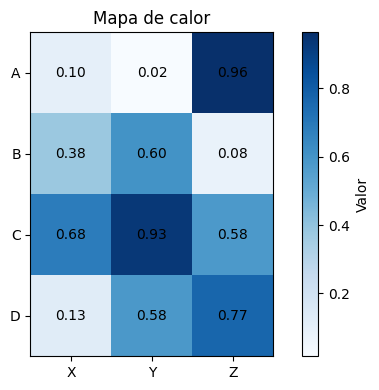

In [22]:
# Mapa de calor con matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Crear datos de ejemplo
data = np.random.rand(4, 3)
df = pd.DataFrame(
    data,
    index=["A", "B", "C", "D"],
    columns=["X", "Y", "Z"]
)

# Crear figura
fig, ax = plt.subplots(figsize=(6, 4))

# Mostrar el mapa de calor
im = ax.imshow(df, cmap="Blues")

# Etiquetas de ejes
ax.set_xticks(np.arange(len(df.columns)))
ax.set_yticks(np.arange(len(df.index)))

ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.index)

# Agregar valores numéricos sobre las celdas
for i in range(len(df.index)):
    for j in range(len(df.columns)):
        valor = f"{df.iloc[i, j]:.2f}"
        ax.text(j, i, valor, ha="center", va="center", color="black")

# Barra de color
cbar = plt.colorbar(im)
cbar.set_label("Valor")

# Título y ajustes
ax.set_title("Mapa de calor")
plt.tight_layout()
plt.show()



### Diagramas de caja (Boxplots)

#### Concepto general

Un **boxplot** es una representación gráfica que resume la
**distribución de una variable numérica** mostrando su **tendencia central**,
**dispersión** y **valores atípicos**.

#### Componentes principales

* **Caja (box):** representa el rango intercuartílico (**IQR = Q3 - Q1**), que contiene el 50 % central de los datos.
* **Línea dentro de la caja:** marca la **mediana** (percentil 50).
* **whiskers:** se extienden hasta los valores que están dentro de un rango típico,
  normalmente $ Q1 - 1.5 \times IQR $ y $ Q3 + 1.5 \times IQR $.
* **Puntos fuera de los whiskers:** indican **valores atípicos** (*outliers*).

#### Qué permite observar

* **Tendencia central:** posición de la mediana.
* **Dispersión:** amplitud del IQR y longitud de los bigotes.
* **Simetría o sesgo:** ubicación relativa de la mediana dentro de la caja.
* **Outliers:** puntos individuales fuera del rango típico.



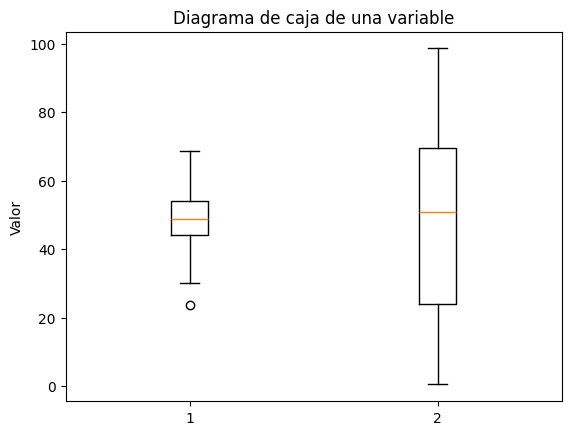

In [25]:

import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
np.random.seed(42)
data_1 = np.random.normal(50, 10, 100)
data_2 = np.random.uniform(0, 100, 100)

# Crear boxplot
plt.boxplot([data_1, data_2], vert=True)
plt.title("Diagrama de caja de una variable")
plt.ylabel("Valor")
plt.show()


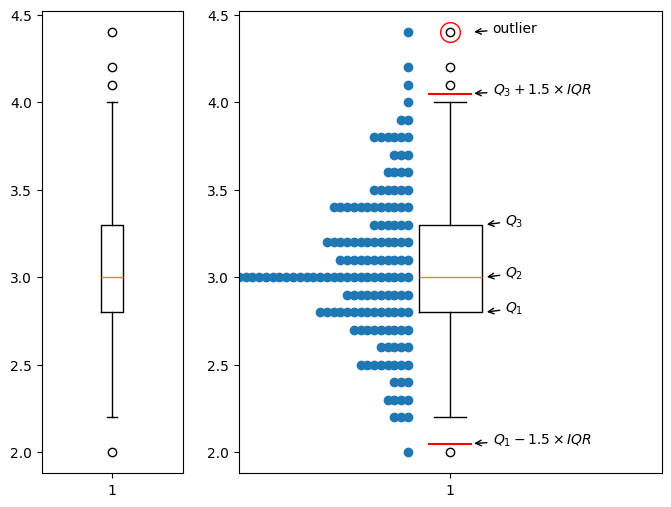

In [26]:
import C01
C01.boxplot_example()

### Funciones empíricas de distribución acumulada (ECDF)

#### Concepto general

La **función empírica de distribución acumulada (ECDF)** muestra la **proporción acumulada de observaciones** menores o iguales a un valor dado.

Es una estimación directa de la **función de distribución acumulada (CDF)** a partir de los datos observados, sin asumir un modelo probabilístico.

#### Características principales

* Se construye **ordenando los datos** y asignando a cada valor su **frecuencia acumulada relativa**.
* Es una **función no decreciente** que toma valores entre 0 y 1.
* En cada punto ( x_i ), representa la probabilidad empírica:
  $ F_n(x_i) = \frac{\text{número de observaciones} \leq x_i}{n} $
* Permite comparar distribuciones observadas con distribuciones teóricas (por ejemplo, normal o uniforme).

#### Qué permite observar

* La **forma acumulada** de la distribución.
* Diferencias entre **muestras o grupos**.
* Identificación de **asimetrías** o **colas largas**.



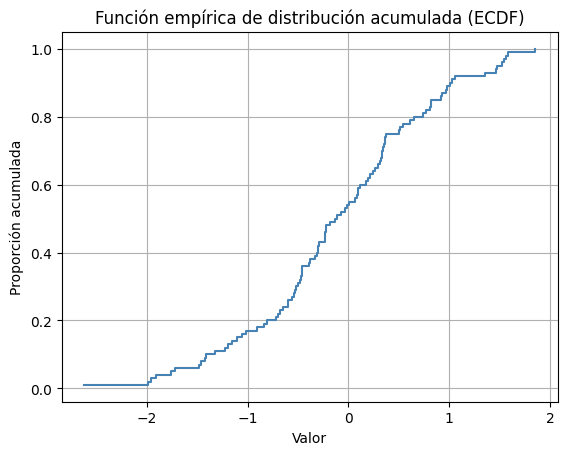

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de ejemplo
np.random.seed(42)
data = np.random.normal(0, 1, 100)

# Ordenar los datos
x = np.sort(data)
y = np.arange(1, len(x) + 1) / len(x)

# Graficar ECDF
plt.step(x, y, where='post', color='steelblue')
plt.title("Función empírica de distribución acumulada (ECDF)")
plt.xlabel("Valor")
plt.ylabel("Proporción acumulada")
plt.grid(True)
plt.show()



## Teorización *Post Hoc* y *Data Fishing*

La **teorización post hoc** ocurre cuando se **formulan hipótesis después de analizar los datos**, en lugar de antes.

Esto suele ser parte del análisis descriptivo de los datos.

Las conclusiones pueden parecer significativas, pero en realidad **solo reflejan patrones accidentales** presentes en el conjunto de datos utilizado.

La teorización post hoc no es necesariamente inválida, pero **las hipótesis generadas deben validarse de manera independiente** para garantizar su solidez.

### Riesgos principales

* **Sesgo de confirmación:** aceptar hipótesis que solo son válidas para el conjunto analizado.
* **Sobreajuste (overfitting):** el modelo o conclusión se adapta al ruido en lugar de a la señal.
* **Falsa significación:** los resultados no se replican en nuevos datos o experimentos.

### Ejemplo en bioinformática

Este problema puede aparecer cuando:

* Se analizan **todas las observaciones posibles** (por ejemplo, genes, proteínas, secuencias) de una base de datos.
* No quedan datos independientes para **validar** las hipótesis generadas.
* Se reportan asociaciones que **no se reproducen** en estudios posteriores.

### *Data Fishing* o *P-hacking*

Práctica de **probar muchas hipótesis o combinaciones de variables** hasta encontrar alguna que resulte “significativa”.
Esto **aumenta la probabilidad de falsos positivos** y reduce la validez científica de los resultados.

### Estrategias para evitar el sesgo post hoc

* **Recolección adicional de datos:** obtener un nuevo conjunto (*out-of-sample*) para validar las hipótesis.
* **División aleatoria del conjunto de datos:**

  * Un grupo para **descubrir** patrones (exploración).
  * Otro para **evaluar** las hipótesis (validación).
* **Validación cruzada (cross-validation):** evaluar el desempeño de un modelo en distintas particiones de los datos.
* **Corrección por tests múltiples:** aplicar ajustes (por ejemplo, Bonferroni, FDR) cuando se prueban muchas hipótesis.
